# 线性回归从零实现

In [25]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

根据带有噪声的线性模型构造一个人造数据集
使用线性模型参数 $w = [2 ,-3.4]^T$, b = 4.2 和噪声项 $\epsilon$
$$y = Xw + b + \epsilon$$

In [26]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 均值为0，方差为1， shape:n * len(w)
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # 加入噪音
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [27]:
print('features', features[0], '\nlabel',labels[0])

features tensor([-0.2221, -0.9084]) 
label tensor([6.8396])


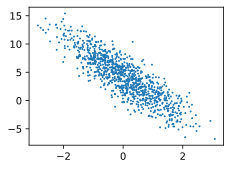

In [28]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [29]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本时随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        

In [30]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,"\n", y)
    break

tensor([[ 1.9044, -1.2382],
        [-0.3351, -0.6166],
        [-0.4450,  0.5325],
        [ 0.5834, -0.5084],
        [ 1.9355, -0.7336],
        [-0.4040,  1.5129],
        [-1.4077,  0.0488],
        [ 0.1334,  1.2068],
        [ 0.4941,  0.7251],
        [-0.4696, -0.5470]]) 
 tensor([[12.2009],
        [ 5.6190],
        [ 1.4887],
        [ 7.0755],
        [10.5668],
        [-1.7633],
        [ 1.2249],
        [ 0.3734],
        [ 2.7300],
        [ 5.1244]])


### 定义 初始化模型参数

In [31]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型

In [32]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 定义损失函数

In [33]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

In [34]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            

### 训练

In [35]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size,features, labels):
        l = loss(net(X, w, b), y) # x, y的小批量损失
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1},loss {float(train_l.mean()):f}')

epoch 1,loss 0.042564
epoch 2,loss 0.000162
epoch 3,loss 0.000050


### 比较真实参数通过训练学到的参数来评估训练的成功程度

In [36]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 0.0005, -0.0003], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0008], grad_fn=<RsubBackward1>)
